# Examen Python data developer
# Deel 1
## Introductie
Voor dit examen is het belangrijk dat je volgende zaken zeker doet:
 - Maak een Vitual Environment aan & exporteer een `.yml` (of soortgelijke) file aan die je toevoegt aan je codebase.
 - Maak een github pagina aan met een bijhorende `.gitignore` en `readme.md`. Voeg een link naar de github repo toe aan je readme file.
 - Zorg dat je op het einde de tijd neemt om je code op te schonen zodat deze begrijpelijk is voor derden.
 - Wanneer je klaar bent, maak een `.zip` bestand van je volledige codebase aan en laad deze op in de leeromgeving.

In deze opgave bekijken we een gesimuleerde dataset over de geboortes in België van 2019. De data is te vinden in `.csv` bestanden die gelabeld zijn met de echte geboortedag van de personen in het bestand. Laat ons bijvoorbeeld even kijken naar de eerste 5 lijnen van het bestand `2019-1-1.csv`:

<table align="center">
  <tr>
    <th>gemeente</th>
    <th>naam</th>
    <th>geslacht</th>
    <th>verwachte datum</th>
  </tr>
  <tr>
    <td>Hooglede</td>
    <td>Elias</td>
    <td>Mannelijk</td>
    <td>01/14/2019</td>
  </tr>
  <tr>
    <td>Sint-Niklaas (Sint-Niklaas)</td>
    <td>Pauline</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Wijnegem</td>
    <td>Anita</td>
    <td>Vrouwelijk</td>
    <td>01/05/2019</td>
  </tr>
  <tr>
    <td>Grâce-Hollogne</td>
    <td>Jean-Paul</td>
    <td>Mannelijk</td>
    <td>01/13/2019</td>
  </tr>
  <tr>
    <td>Boussu</td>
    <td>François</td>
    <td>Mannelijk</td>
    <td>01/26/2019</td>
  </tr>
</table>


Hier hebben we de kolommen:
 - **gemeente**: De gemeente waar de persoon geboren is.
 - **naam**: De voornaam van de persoon.
 - **geslacht**: Het geslacht van de persoon (Mannelijk of Vrouwelijk).
 - **verwachte datum**: De verwachte geboortedatum van de persoon.

Dus hier hebben we dan bijvoorbeeld op de eerste lijn de mannelijke persoon Elias die geboren is in Hooglede waarvan men verwachtte dat hij zou geboren worden op `01/14/2019` (Amerikaans formaat) maar in feite geboren is op 1 januari 2019.

Doorheen deze opgave gaan we de data van dichterbij inspecteren! Je kan deze opgaves alternatief lezen in de bijgeleverde notebook `examen.ipynb` waar ook de (meeste) afbeeldingen & resultaten zichtbaar zijn.

In [1]:
# Import packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Definieer data locaties
directory = os.path.join('..','data','input')

## Utilities

In [2]:
def to_percentage(number):
    return str(np.round(number * 100, 2)) + "%"

def compute_num_unique(df, n_births):
    return len(np.unique(df['naam'].sample(n_births)))

## Stap 1: data inlezen

Maak een lus over alle bestanden in de map `data/geboortes`, lees elk `.csv` bestand in en voeg deze samen tot 1 grote DataFrame. Merk op dat de datum verwerkt zit in de filename, voeg deze toe aan de kleine DataFrames voor je de dataframes samenvoegt met een `pd.concat(dfs)`.

Voeg een extra kolom toe met een `"dag van het jaar"` getal, dus 1 januari 2019 is `1`, 2 januari 2019 is `2`, enzovoort.

**Opmerking**: Er is ook data voor 29 februari 2019, terwijl dit geen schrikkeljaar is! Plaats deze geboortes in een afzonderlijke DataFrame `df_wrong`. Zet in `df_wrong` een extra kolom met een referentie naar waarom deze data foutief is.

In [70]:
# Lijst om alle dataframes op te slaan
dataframes = []

# Loop door alle bestanden in de directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Volledige pad naar het bestand
        filepath = os.path.join(directory, filename)
        # Lees het CSV-bestand in een dataframe
        df = pd.read_csv(filepath)
        # Voeg een kolom datum toe (bestandsnaam zonder extensie)
        df['datum'] = os.path.splitext(filename)[0]
        # Voeg het dataframe toe aan de lijst
        dataframes.append(df)

# Combineer alle dataframes in één groot dataframe
raw_df = pd.concat(dataframes, ignore_index=True)

raw_df

,gemeente,naam,geslacht,verwachte datum,datum
0,Hooglede,Elias,Mannelijk,01/14/2019,2019-1-1
1,Sint-Niklaas (Sint-Niklaas),Pauline,Vrouwelijk,01/05/2019,2019-1-1
2,Wijnegem,Anita,Vrouwelijk,01/05/2019,2019-1-1
3,Grâce-Hollogne,Jean-Paul,Mannelijk,01/13/2019,2019-1-1
4,Boussu,François,Mannelijk,01/26/2019,2019-1-1
...,...,...,...,...,...
116918,Lede,Lobke,Vrouwelijk,09/12/2019,2019-9-9
116919,Westerlo,Willem,Mannelijk,09/04/2019,2019-9-9
116920,Brugge,Diane,Vrouwelijk,09/20/2019,2019-9-9
116921,Lendelede,Marie-Rose,Vrouwelijk,10/28/2019,2019-9-9


In [8]:
#Aanpassingen voor datum

# Identificeer de rijen waar de datum 29 februari 2019 is
mask = (raw_df['datum'] == '2019-2-29')

# Plaats deze rijen in een aparte DataFrame
df_wrong = raw_df[mask]

# Verwijder deze rijen uit de oorspronkelijke DataFrame
df = raw_df[~mask].copy()

print(df_wrong)

df['datum'] = pd.to_datetime(df['datum'])

# Maak een nieuwe kolom 'dag van het jaar'
df['dag van het jaar'] = df['datum'].dt.dayofyear

print(df)



                  gemeente        naam    geslacht verwachte datum      datum
44768              Kruisem     Patrick   Mannelijk      02/27/2019  2019-2-29
44769  Montigny-le-Tilleul       Sarah  Vrouwelijk      03/11/2019  2019-2-29
44770           Diepenbeek  Valentinus   Mannelijk      03/02/2019  2019-2-29
44771  Sint-Jans-Molenbeek          El   Mannelijk      02/27/2019  2019-2-29
44772             Overijse    Apolline  Vrouwelijk      03/03/2019  2019-2-29
...                    ...         ...         ...             ...        ...
44836            Herentals        Leen  Vrouwelijk      03/10/2019  2019-2-29
44837      ’s Gravenbrakel    Caroline  Vrouwelijk      03/02/2019  2019-2-29
44838                Ieper     Marleen  Vrouwelijk      03/12/2019  2019-2-29
44839                Ciney       Alain   Mannelijk      02/28/2019  2019-2-29
44840         Sint-Truiden        Inge  Vrouwelijk      03/15/2019  2019-2-29

[73 rows x 5 columns]
                           gemeente      

## Stap 2: Dagelijks aantal geboortes bekijken
#### Vraag 1: Maak een plot van het aantal geboortes per dag van het jaar. 

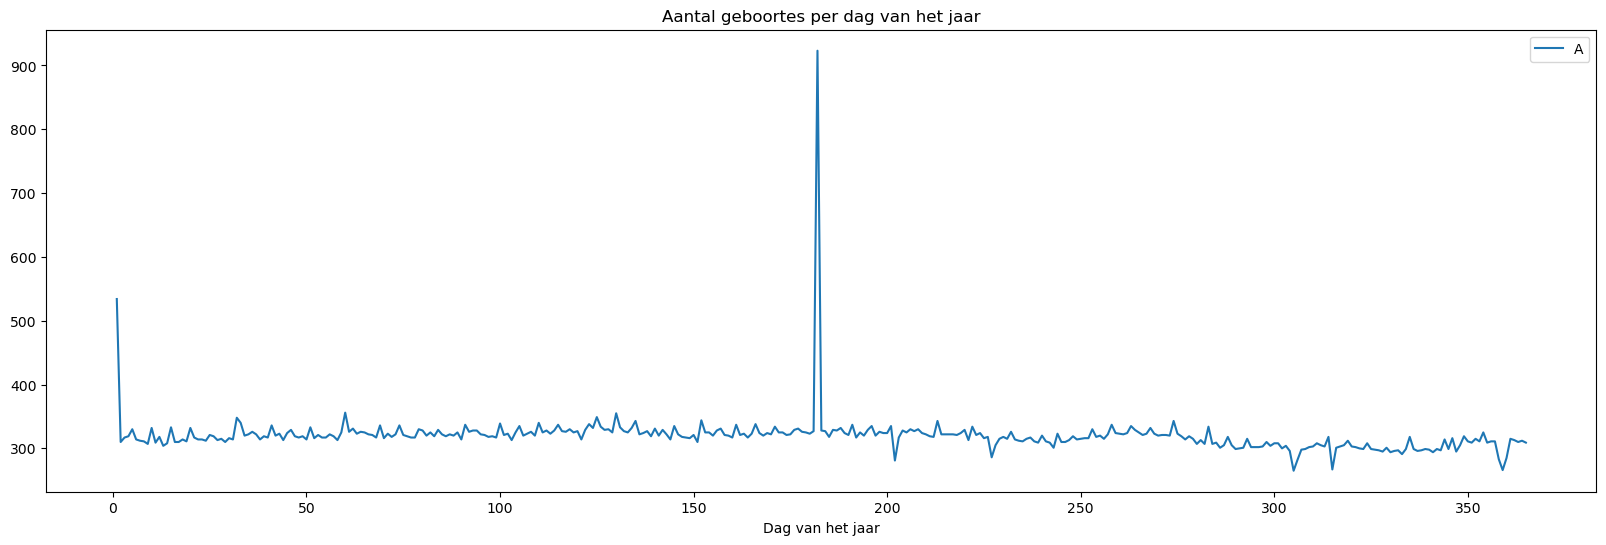

In [9]:
# Bereken het aantal geboortes per dag van het jaar
geboortes_per_dag = df['dag van het jaar'].value_counts().sort_index()

# Maak een plot
plt.figure(figsize=(20, 6))
plt.plot(geboortes_per_dag)
plt.xlabel('Dag van het jaar')
plt.title('Aantal geboortes per dag van het jaar')
plt.legend('Aantal geboortes')
plt.show()


##

#### Vraag 2: Outliers vinden & behandelen

We klassificeren een datum als een outlier als het aantal geboortes meer dan `50%` afwijkt van de gemiddelde waarde overheen de volledige dataset. Zoek alle outliers in de dataset.

In [10]:
# Bereken het gemiddelde aantal geboortes
gemiddelde_geboortes = df['dag van het jaar'].value_counts().mean()

# Bereken de drempel voor outliers
drempel = gemiddelde_geboortes * 1.5

# Vind de outliers
outliers = df[df['dag van het jaar'].map(df['dag van het jaar'].value_counts()) > drempel]

outliers['datum'].unique()


<DatetimeArray>
['2019-01-01 00:00:00', '2019-07-01 00:00:00']
Length: 2, dtype: datetime64[ns]

Ik zal je vertellen; de outliers op 1 januari en 1 juli komen doordat alle geboortes waarvoor de datum niet correct genoteerd is, de datum 1 januari (voor de eerste helft van het jaar) en op 1 juli (voor de tweede helft van het jaar) geplaatst worden. Om dit op te lossen, halen we in de grote geboortes DataFrame (met 1 lijn per geboorte) deze twee datums er volledig uit. Dus we gaan **alle** geboortes van 1 januari en 1 juli verwijderen uit deze dataframe en toevoegen aan de `df_wrong` dataframe met als reden `2019-01-01` en `2019-07-01`.

In [115]:
# Vind de geboortes op 1 januari en 1 juli
outliers = df[df['datum'].isin(['2019-01-01', '2019-07-01'])]

# Voeg de outliers toe aan df_wrong
df_wrong = pd.concat([df_wrong, outliers])

# Verwijder de outliers uit df
filtered_df = df[~df['datum'].isin(['2019-01-01', '2019-07-01'])]

filtered_df

,gemeente,naam,geslacht,verwachte datum,datum,verwachte dag van het jaar
0,Chaudfontaine,Jean,Mannelijk,2019-09-10,2019-09-10,253
1,Brugge,Marguerite,Vrouwelijk,2019-09-10,2019-09-10,253
2,Houthulst,Bram,Mannelijk,2019-09-16,2019-09-16,259
3,Leuven,Jan,Mannelijk,2019-09-10,2019-09-10,253
4,Antwerpen,Vera,Vrouwelijk,2019-09-16,2019-09-16,259
...,...,...,...,...,...,...
311,Lede,Lobke,Vrouwelijk,2019-09-12,2019-09-12,255
312,Westerlo,Willem,Mannelijk,2019-09-04,2019-09-04,247
313,Brugge,Diane,Vrouwelijk,2019-09-20,2019-09-20,263
314,Lendelede,Marie-Rose,Vrouwelijk,2019-10-28,2019-10-28,301


Maak dezelfde plot nu opnieuw met het aantal geboortes per dag.

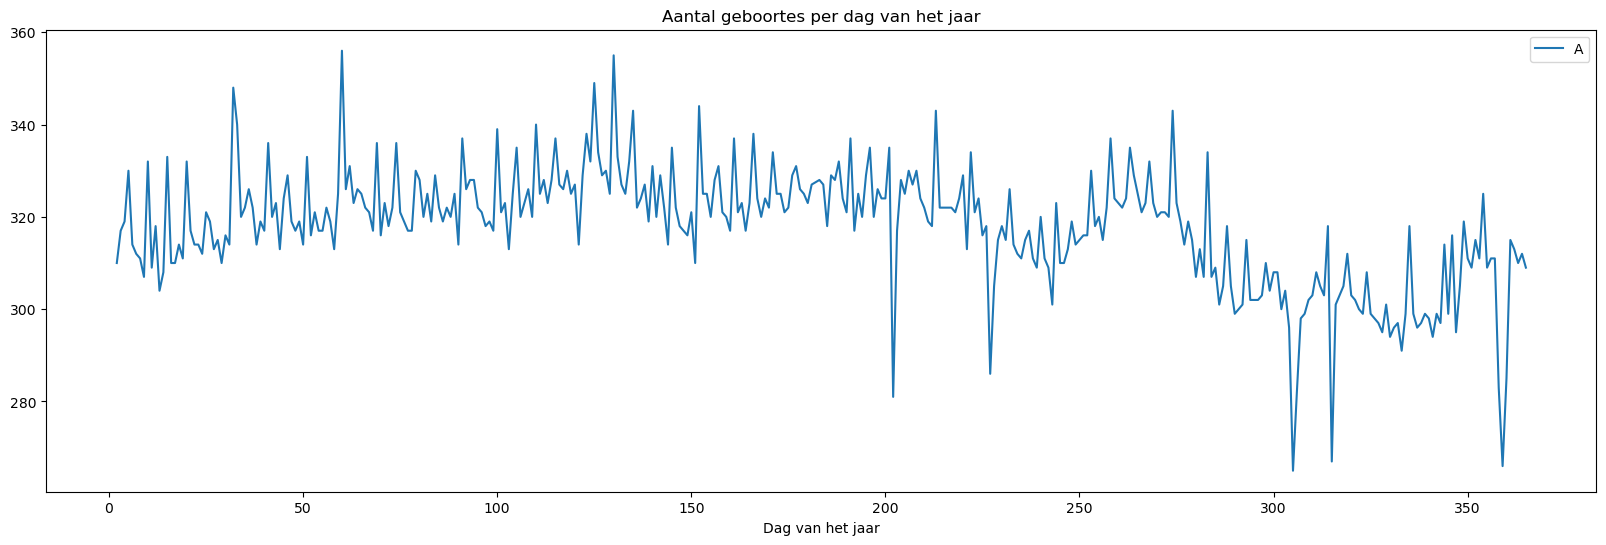

In [12]:
# Bereken het aantal geboortes per dag van het jaar
filtered_geboortes_per_dag = filtered_df['dag van het jaar'].value_counts().sort_index()

# Maak een plot
plt.figure(figsize=(20, 6))
plt.plot(filtered_geboortes_per_dag)
plt.xlabel('Dag van het jaar')
plt.title('Aantal geboortes per dag van het jaar')
plt.legend('Aantal geboortes')
plt.show()

 We zien dat er nog steeds redelijk wat uitschieters zijn, kan je code schrijven om de 5 extreme uitschieters in de 2e helft van het jaar identificeren (in totaal 8 datums)?

In [13]:
# Groepeer de DataFrame op 'datum' en 'dag van het jaar', en tel het aantal rijen in elke groep
geboortes_per_dag = filtered_df.groupby(['datum', 'dag van het jaar']).size()

# Maak een nieuwe DataFrame met de resultaten
df_geboortes = geboortes_per_dag.reset_index(name='Aantal geboortes')

df_geboortes.sort_values(by='Aantal geboortes').head(8)


,datum,dag van het jaar,Aantal geboortes
302,2019-11-01,305,265
356,2019-12-25,359,266
312,2019-11-11,315,267
199,2019-07-21,202,281
303,2019-11-02,306,282
355,2019-12-24,358,283
357,2019-12-26,360,285
224,2019-08-15,227,286


### Bonusvraag: wekelijkse verbanden

We zien vele pieken en dalen in de evolutie van het aantal geboortes. We willen deze grafiek graag iets "gladder" maken. Kan je hiervoor eens een visualizatie maken van het **gemiddeld** aantal geboortes per week (dit voor elke week, dus maandag-maandag, dinsdag-dinsdag, woensdag-woensdag, ...).

In [18]:
# Maak een nieuwe kolom 'dag van de week' in filtered_df
filtered_df['dag van de week'] = filtered_df['datum'].dt.day_name()

# Maak een kopie van filtered_df om dag_df te maken
dag_df = filtered_df.copy()

dag_df

C:\Users\yanni\AppData\Local\Temp\ipykernel_18400\4211556784.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['dag van de week'] = filtered_df['datum'].dt.day_name()


,gemeente,naam,geslacht,verwachte datum,datum,dag van het jaar,dag van de week
534,Merksplas,Liliane,Vrouwelijk,01/04/2019,2019-01-10,10,Thursday
535,Bornem,Jeroen,Mannelijk,01/10/2019,2019-01-10,10,Thursday
536,Houthalen-Helchteren,Fatima,Vrouwelijk,01/21/2019,2019-01-10,10,Thursday
537,Lievegem,Hilaire,Mannelijk,01/15/2019,2019-01-10,10,Thursday
538,Spiere-Helkijn,Christian,Mannelijk,01/16/2019,2019-01-10,10,Thursday
...,...,...,...,...,...,...,...
116918,Lede,Lobke,Vrouwelijk,09/12/2019,2019-09-09,252,Monday
116919,Westerlo,Willem,Mannelijk,09/04/2019,2019-09-09,252,Monday
116920,Brugge,Diane,Vrouwelijk,09/20/2019,2019-09-09,252,Monday
116921,Lendelede,Marie-Rose,Vrouwelijk,10/28/2019,2019-09-09,252,Monday


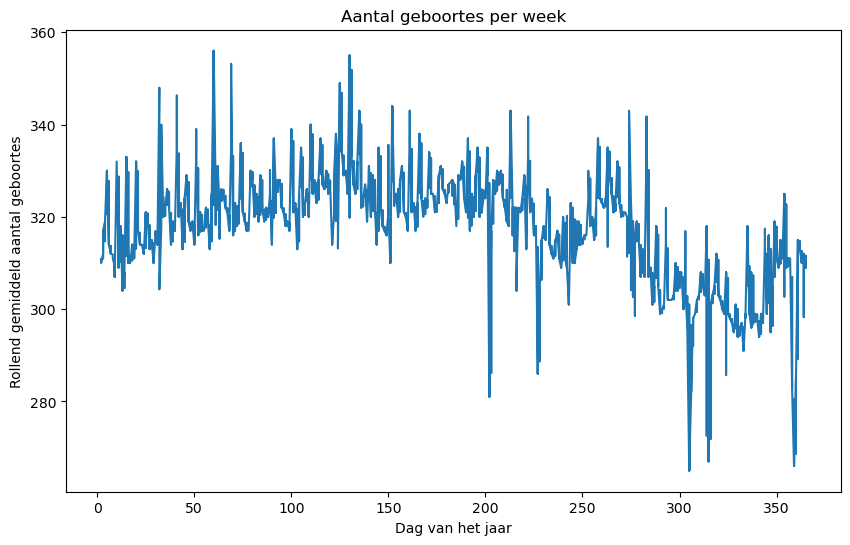

In [20]:
# Bereken het aantal geboortes per 'dag van het jaar'
dag_df['Aantal geboortes'] = dag_df.groupby('dag van het jaar')['datum'].transform('count')

# Bereken het rollend gemiddelde aantal geboortes per week
dag_df['rollend gemiddelde'] = dag_df['Aantal geboortes'].rolling(7, min_periods=1).mean()

# Sorteer de DataFrame op 'dag van het jaar'
dag_df = dag_df.sort_values('dag van het jaar')

# Maak een plot
plt.figure(figsize=(10, 6))
plt.plot(dag_df['dag van het jaar'], dag_df['rollend gemiddelde'])
plt.xlabel('Dag van het jaar')
plt.ylabel('Rollend gemiddeld aantal geboortes')
plt.title('Aantal geboortes per week')
plt.show()


Dat ziet er al een stuk mooier uit!  We zien ook een aantal duidelijk dips & pieken verschijnen die we eerder niet zagen. We kunnen nu ook even kijken naar het gemiddeld aantal geboortes per dag van de week! Misschien worden er wel gewoon veel minder mensen geboren op zondag dan een andere dag?

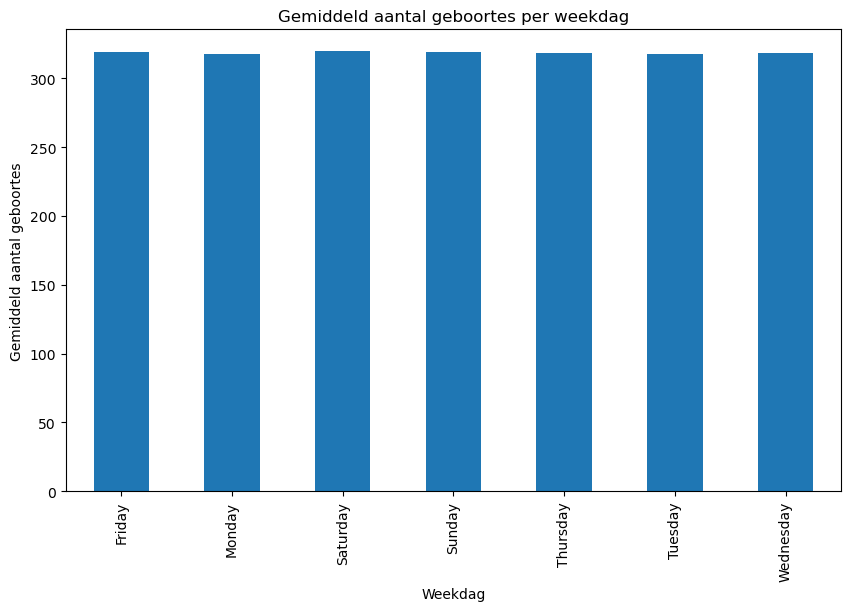

In [21]:
# Bereken het aantal geboortes per dag
dag_df['Aantal geboortes'] = dag_df.groupby('dag van het jaar')['dag van de week'].transform('count')

# Bereken het gemiddelde aantal geboortes per weekdag
gemiddelde_geboortes_per_weekdag = dag_df.groupby('dag van de week')['Aantal geboortes'].mean()

# Maak een plot
plt.figure(figsize=(10, 6))
gemiddelde_geboortes_per_weekdag.plot(kind='bar')
plt.xlabel('Weekdag')
plt.ylabel('Gemiddeld aantal geboortes')
plt.title('Gemiddeld aantal geboortes per weekdag')
plt.show()


# Examen Python Data Developer
# Deel 2

### Onderzoek 1: Unisex namen

In [117]:
# Identificeer unisex namen
unisex_names = raw_df.groupby('naam')['geslacht'].nunique()
unisex_names = unisex_names[unisex_names > 1].index.tolist()

# Filter de dataframe voor unisex namen
unisex_df = raw_df[raw_df['naam'].isin(unisex_names)]


# Bereken de meest populaire unisex naam voor elke categorie door een groupby per naam te doen en te sorteren
male = unisex_df[unisex_df['geslacht'] == 'Mannelijk'].groupby('naam').size().reset_index(name='aantal').sort_values(by='aantal',ascending=False)
female = unisex_df[unisex_df['geslacht'] == 'Vrouwelijk'].groupby('naam').size().reset_index(name='aantal').sort_values(by='aantal',ascending=False)
unisex = unisex_df.groupby('naam').size().reset_index(name='aantal').sort_values(by='aantal',ascending=False)

print('Populairse unisex naam bij de mannen: ',male.iloc[0]['naam'])
print('Populairse unisex naam bij de vrouwen: ',female.iloc[0]['naam'])
print('Populairse unisex naam in het algemeen: ',unisex.iloc[0]['naam'])

Populairse unisex naam bij de mannen:  Maxime
Populairse unisex naam bij de vrouwen:  Dominique
Populairse unisex naam in het algemeen:  Dominique


In [129]:

# Groepeer de data per naam en tel het aantal voorkomen per geslacht
naam_geslacht_counts = raw_df.groupby(['naam', 'geslacht']).size().unstack(fill_value=0)

# Bereken het totaal aantal voorkomen per naam
naam_totalen = naam_geslacht_counts.sum(axis=1)

# Bereken het percentage voorkomen per geslacht per naam
naam_percentages = naam_geslacht_counts.div(naam_totalen, axis=0) * 100

# Identificeer namen die meer dan 50% voorkomen
voorkomen_meer_dan_50 = naam_percentages[naam_percentages > 50].dropna(how='all').index.tolist()

# Filter de dataframe voor deze namen
echt_df = raw_df[raw_df['naam'].isin(voorkomen_meer_dan_50)]

# Identificeer unisex namen
echt_unisex_names = echt_df.groupby('naam')['geslacht'].nunique()
echt_unisex_names = echt_unisex_names[echt_unisex_names > 1].index.tolist()

# Filter de dataframe voor unisex namen
echt_unisex_df = echt_df[echt_df['naam'].isin(echt_unisex_names)]


# Bereken de meest populaire unisex naam voor elke categorie door een groupby per naam te doen en te sorteren
echt_male = echt_unisex_df[echt_unisex_df['geslacht'] == 'Mannelijk'].groupby('naam').size().reset_index(name='aantal').sort_values(by='aantal',ascending=False)
echt_female = echt_unisex_df[echt_unisex_df['geslacht'] == 'Vrouwelijk'].groupby('naam').size().reset_index(name='aantal').sort_values(by='aantal',ascending=False)
echt_unisex = echt_unisex_df.groupby('naam').size().reset_index(name='aantal').sort_values(by='aantal',ascending=False)

print('Populairse echte unisex naam bij de mannen: ',male.iloc[0]['naam'])
print('Populairse echte unisex naam bij de vrouwen: ',female.iloc[0]['naam'])
print('Populairse echte unisex naam in het algemeen: ',unisex.iloc[0]['naam'])

Populairse echte unisex naam bij de mannen:  Maxime
Populairse echte unisex naam bij de vrouwen:  Dominique
Populairse echte unisex naam in het algemeen:  Dominique


In [128]:
# Groepeer de data per naam en geslacht en tel het aantal voorkomen per combinatie
naam_geslacht_counts = echt_unisex_df.groupby(['naam', 'geslacht']).size().unstack(fill_value=0)

# Bereken het totaal aantal voorkomen per naam
naam_totalen = naam_geslacht_counts.sum(axis=1)

# Bereken het percentage voorkomen van elke naam per geslacht
naam_percentages = naam_geslacht_counts.div(naam_totalen, axis=0) * 100

# Zet het resultaat in een DataFrame voor een netter overzicht
naam_percentages_df = naam_percentages.reset_index()
naam_percentages_df.columns = ['naam', 'percentage_mannen', 'percentage_vrouwen']
print(naam_percentages_df)

       naam  percentage_mannen  percentage_vrouwen
0     Adama          25.000000           75.000000
1    Alexis          98.550725            1.449275
2      Amel           7.142857           92.857143
3     Amine          96.969697            3.030303
4    Andrea          32.352941           67.647059
..      ...                ...                 ...
63   Simone           4.285714           95.714286
64   Tenzin          62.500000           37.500000
65     Toby          25.000000           75.000000
66  Yannick          98.947368            1.052632
67    Yentl          12.500000           87.500000

[68 rows x 3 columns]


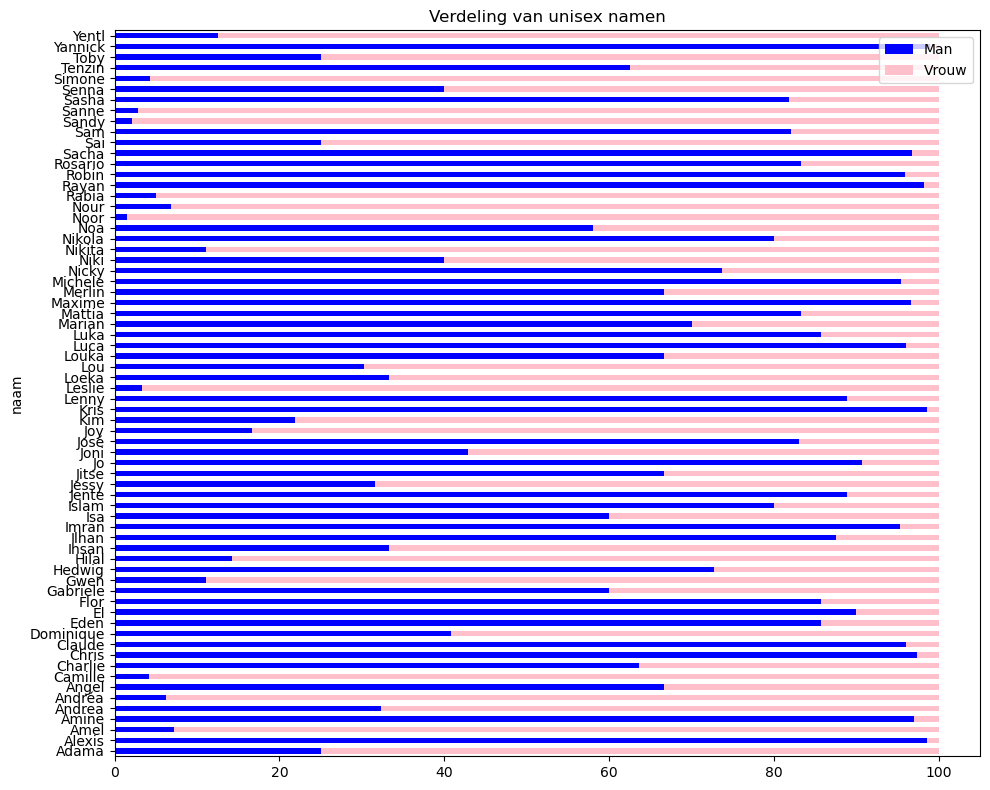

In [135]:
#Maak een horizontale stacked bar chart
fig, ax = plt.subplots(figsize=(10, 8))

naam_percentages_df.set_index('naam').plot(kind='barh', stacked=True, ax=ax, color=['blue', 'pink'])

ax.set_title('Verdeling van unisex namen')

# Legenda
ax.legend(['Man', 'Vrouw'], loc='upper right')

# Toon de grafiek
plt.tight_layout()
plt.show()

### Onderzoek 2: de accuraatheid van de geschatte bevallingsdatum

In [81]:
filtered_df['verwachte datum'] = pd.to_datetime(filtered_df['verwachte datum'])

# Maak een nieuwe kolom 'dag van het jaar'
filtered_df['verwachte dag van het jaar'] = filtered_df['verwachte datum'].dt.dayofyear

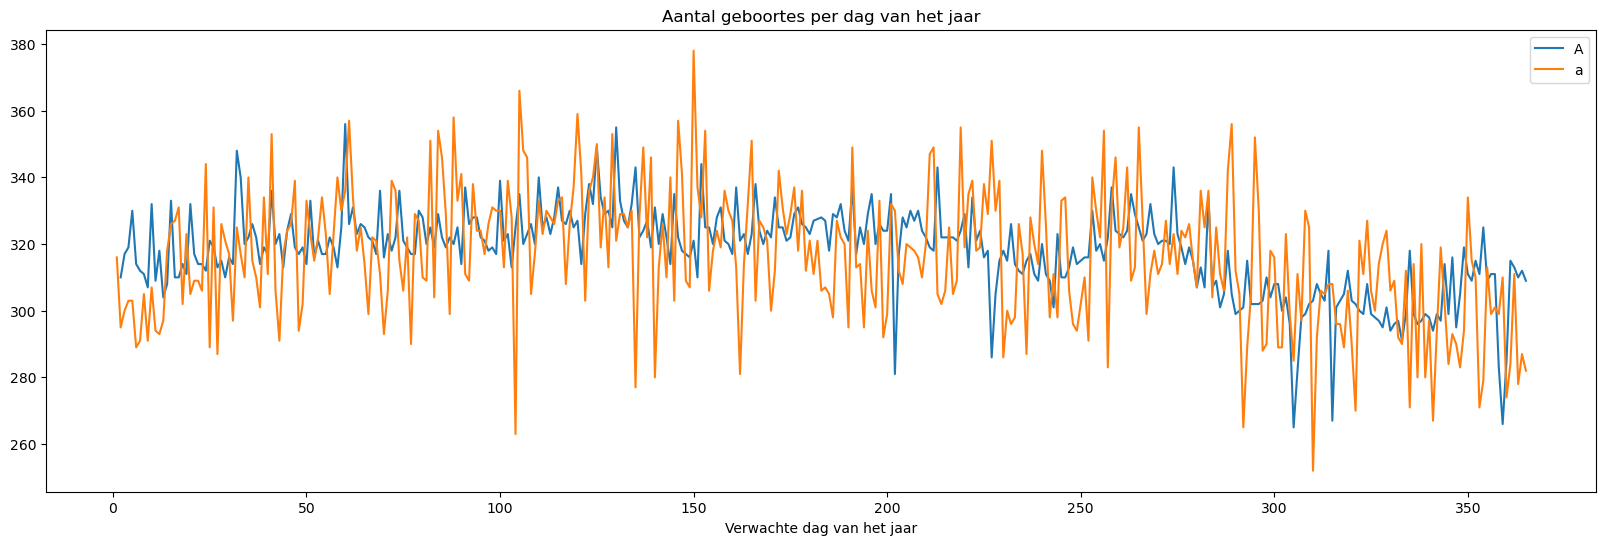

In [86]:
# Bereken het aantal geboortes per dag van het jaar
filtered_geboortes_per_dag = filtered_df['dag van het jaar'].value_counts().sort_index()
# Bereken het aantal geboortes per dag van het jaar
verwachte_geboortes_per_dag = filtered_df['verwachte dag van het jaar'].value_counts().sort_index()

# Maak een plot
plt.figure(figsize=(20, 6))
plt.plot(filtered_geboortes_per_dag)
plt.plot(verwachte_geboortes_per_dag)
plt.xlabel('Verwachte dag van het jaar')
plt.title('Aantal geboortes per dag van het jaar')
plt.legend('Aantal geboortes')
plt.show()

In [107]:
vroeg_df['verschil'] = filtered_df['datum'].copy() - filtered_df['verwachte datum'].copy()
vroeg_df['verschil']=vroeg_df['verschil'].dt.days.astype(float).copy()

C:\Users\yanni\AppData\Local\Temp\ipykernel_18400\567571742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vroeg_df['verschil'] = filtered_df['datum'].copy() - filtered_df['verwachte datum'].copy()
C:\Users\yanni\AppData\Local\Temp\ipykernel_18400\567571742.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vroeg_df['verschil']=vroeg_df['verschil'].dt.days.astype(float).copy()


In [108]:
vroeg_df

,gemeente,naam,geslacht,verwachte datum,datum,dag van het jaar,dag van de week,verwachte dag van het jaar,verschil
536,Houthalen-Helchteren,Fatima,Vrouwelijk,2019-01-21,2019-01-10,10,Thursday,21,-11.0
537,Lievegem,Hilaire,Mannelijk,2019-01-15,2019-01-10,10,Thursday,15,-5.0
538,Spiere-Helkijn,Christian,Mannelijk,2019-01-16,2019-01-10,10,Thursday,16,-6.0
539,Knokke-Heist,Tine,Vrouwelijk,2019-01-12,2019-01-10,10,Thursday,12,-2.0
540,Elsene,Gladys,Vrouwelijk,2019-01-11,2019-01-10,10,Thursday,11,-1.0
...,...,...,...,...,...,...,...,...,...
116916,Brunehaut,Loïc,Mannelijk,2019-09-15,2019-09-09,252,Monday,258,-6.0
116917,Maldegem,Günther,Mannelijk,2019-09-30,2019-09-09,252,Monday,273,-21.0
116918,Lede,Lobke,Vrouwelijk,2019-09-12,2019-09-09,252,Monday,255,-3.0
116920,Brugge,Diane,Vrouwelijk,2019-09-20,2019-09-09,252,Monday,263,-11.0


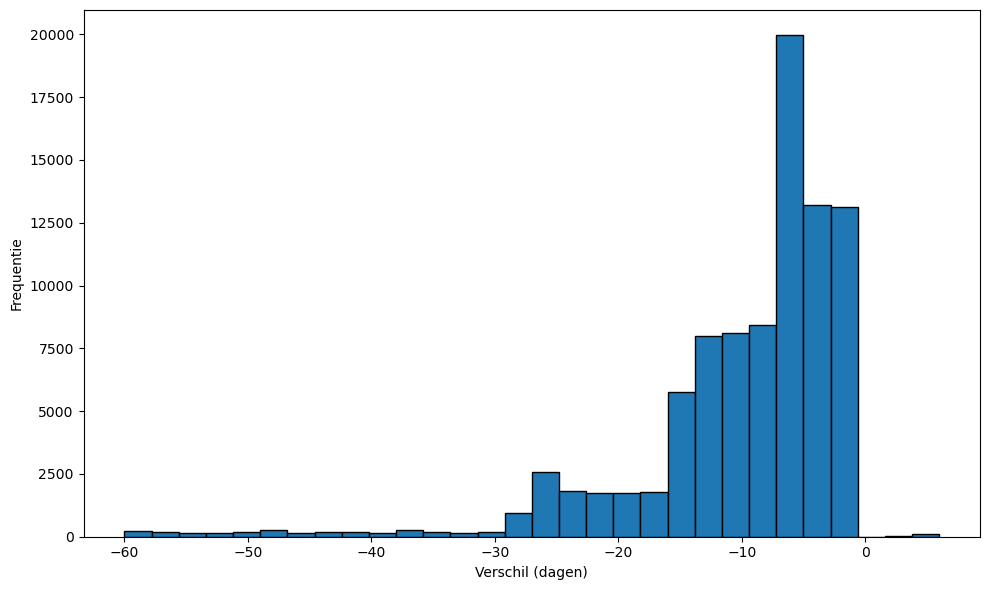

In [104]:
# Maak een histogram van de kolom 'verschil'
plt.figure(figsize=(10, 6))
plt.hist(vroeg_df['verschil'], bins=30, edgecolor='black')

# Grafiektitels en labels
plt.xlabel('Verschil (dagen)')
plt.ylabel('Frequentie')
plt.grid(False)
plt.tight_layout()

# Toon de grafiek
plt.show()

ValueError: x and y must be the same size

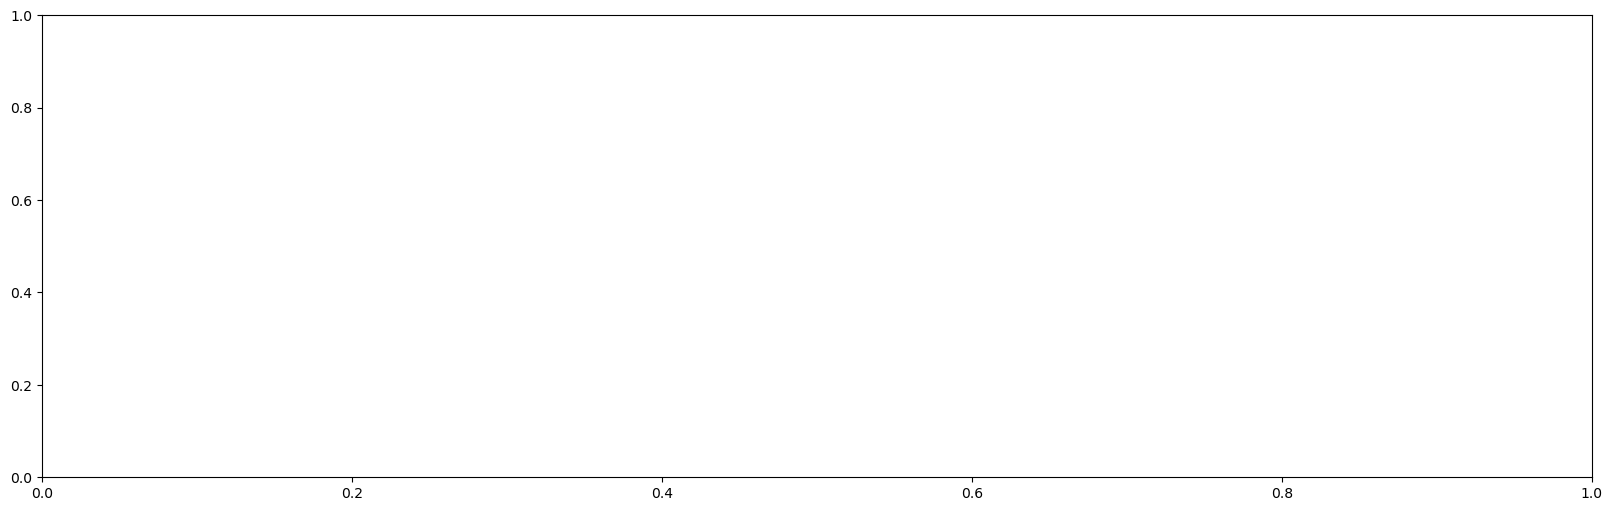

In [110]:

# Maak een scatterplot
plt.figure(figsize=(20, 6))
plt.scatter(filtered_geboortes_per_dag, verwachte_geboortes_per_dag, label='Aantal geboortes per dag', color='b', alpha=0.7)

# Grafiektitels en labels
plt.title('Aantal Geboortes per Dag versus Verwachte Geboortes per Dag')
plt.xlabel('Dag van het jaar')
plt.ylabel('Verwachte dag van het jaar')
plt.legend()
plt.grid(False)
plt.tight_layout()

# Toon de grafiek
plt.show()


### Onderzoek 3: Aantal namen versus aantal babies

geen tijd